In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2228972128440418515
]


In [3]:
import os
import math
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
tf.__version__

'2.5.0'

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [6]:
import csv
reader = csv.reader(open('/content/training_samplestrain.csv', 'r'))
targets = {}
for row in reader:
   k, v = row
   targets[k] = v
print(targets)
reader = csv.reader(open('/content/validation_samplesvalidation.csv', 'r'))
targets_validation = {}
for row in reader:
   k, v = row
   targets_validation[k] = v
print(targets_validation)


{'110800': 'Swiping Down', '32754': 'Swiping Down', '42484': 'Swiping Down', '29411': 'Swiping Down', '80398': 'Swiping Down', '11487': 'Swiping Down', '3191': 'Swiping Down', '37773': 'Swiping Down', '130432': 'Swiping Down', '103503': 'Swiping Down', '140486': 'Swiping Down', '41086': 'Swiping Down', '139804': 'Swiping Down', '15720': 'Swiping Down', '147753': 'Swiping Down', '85676': 'Swiping Down', '63950': 'Swiping Down', '62344': 'Swiping Down', '38027': 'Swiping Down', '136280': 'Swiping Down', '74525': 'Swiping Down', '87599': 'Swiping Down', '53610': 'Swiping Down', '66606': 'Swiping Down', '17419': 'Swiping Down', '72737': 'Swiping Down', '17482': 'Swiping Down', '25753': 'Swiping Down', '89821': 'Swiping Down', '125664': 'Swiping Down', '88760': 'Swiping Down', '63421': 'Swiping Down', '117778': 'Swiping Down', '49802': 'Swiping Down', '5221': 'Swiping Down', '100398': 'Swiping Down', '126676': 'Swiping Down', '10996': 'Swiping Down', '22590': 'Swiping Down', '37402': 'Swipi

In [7]:
len(targets)

print(targets_validation)

{'54598': 'Swiping Down', '45990': 'Swiping Down', '35688': 'Swiping Down', '134204': 'Swiping Down', '83913': 'Swiping Down', '7253': 'Swiping Down', '54532': 'Swiping Down', '119861': 'Swiping Down', '42916': 'Swiping Down', '6486': 'Swiping Down', '134361': 'Swiping Right', '86995': 'Swiping Right', '31599': 'Swiping Right', '41758': 'Swiping Right', '142061': 'Swiping Right', '23944': 'Swiping Right', '96146': 'Swiping Right', '121224': 'Swiping Right', '4746': 'Swiping Right', '6788': 'Swiping Right', '54856': 'Swiping Up', '121273': 'Swiping Up', '5745': 'Swiping Up', '53489': 'Swiping Up', '67541': 'Swiping Up', '65216': 'Swiping Up', '64635': 'Swiping Up', '130103': 'Swiping Up', '112890': 'Swiping Up', '137680': 'Swiping Up', '75935': 'No gesture', '88183': 'No gesture', '2301': 'No gesture', '116222': 'No gesture', '110523': 'No gesture', '104696': 'No gesture', '8398': 'No gesture', '30791': 'No gesture', '93811': 'No gesture', '170': 'No gesture'}


In [8]:
targets_name = ['Swiping Down', 'Swiping Right', 'Swiping Up', 'No gesture']

In [9]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_samples/123019/00032.jpg  
  inflating: training_samples/123019/00029.jpg  
  inflating: training_samples/123019/00013.jpg  
  inflating: training_samples/123019/00002.jpg  
  inflating: training_samples/123019/00014.jpg  
  inflating: training_samples/123019/00019.jpg  
  inflating: training_samples/123019/00003.jpg  
  inflating: training_samples/123019/00005.jpg  
  inflating: training_samples/123019/00024.jpg  
  inflating: training_samples/123019/00016.jpg  
  inflating: training_samples/123019/00008.jpg  
  inflating: training_samples/123019/00001.jpg  
  inflating: training_samples/123019/00012.jpg  
  inflating: training_samples/123019/00010.jpg  
  inflating: training_samples/123019/00023.jpg  
  inflating: training_samples/123019/00015.jpg  
  inflating: training_samples/123019/00035.jpg  
  inflating: training_samples/123019/00025.jpg  
  inflating: training_samples/123019/00022.jpg  
  inflating: train

In [10]:
path = "training_samples/"
path_cv = "validation_samples/"

dirs = os.listdir(path)
dirs_cv = os.listdir(path_cv)

In [11]:
print(len(dirs))
print(len(dirs_cv))

160
40


In [12]:
training_count = 10


In [13]:
hm_frames = 30 
def get_unify_frames(path):
    offset = 0
    frames = os.listdir(path)
    frames_count = len(frames)
    if hm_frames > frames_count:
        frames += [frames[-1]] * (hm_frames - frames_count)
    elif hm_frames < frames_count:
        frames = frames[0:hm_frames]
    return frames  

In [14]:
def resize_frame(frame):
    frame = img.imread(frame)
    frame = cv2.resize(frame, (64, 64))
    return frame
    

In [15]:
counter_training = 0 
training_targets = [] 
new_frames = [] 
for directory in dirs:
    new_frame = [] 
    frames = get_unify_frames(path+directory)
    if len(frames) == hm_frames:
        for frame in frames:
            frame = resize_frame(path+directory+'/'+frame)
            new_frame.append(rgb2gray(frame))
            if len(new_frame) == 15:
                new_frames.append(new_frame) 
                print(int(directory))
                training_targets.append(targets_name.index(targets[str(directory)]))
                counter_training +=1
                new_frame = []

141889
141889
121358
121358
96364
96364
23359
23359
25753
25753
80398
80398
117934
117934
111428
111428
13079
13079
29411
29411
113844
113844
88760
88760
57195
57195
47429
47429
44745
44745
64528
64528
8177
8177
68905
68905
18669
18669
84055
84055
809
809
84795
84795
88267
88267
21758
21758
132767
132767
107554
107554
49832
49832
83888
83888
44895
44895
89140
89140
140515
140515
49802
49802
16659
16659
125664
125664
118587
118587
103798
103798
3191
3191
147753
147753
11464
11464
126766
126766
5221
5221
45450
45450
35153
35153
22590
22590
39501
39501
131103
131103
49785
49785
72737
72737
4430
4430
33361
33361
71755
71755
67998
67998
41086
41086
97266
97266
17419
17419
108539
108539
66606
66606
28500
28500
104388
104388
8404
8404
118045
118045
10996
10996
65813
65813
14380
14380
75373
75373
11702
11702
130750
130750
48282
48282
47141
47141
103503
103503
45871
45871
103006
103006
92609
92609
135183
135183
68621
68621
129961
129961
35583
35583
63388
63388
114113
114113
31420
31420
82752
82

In [16]:
counter_validation = 0
cv_targets = []
new_frames_cv = []
for directory in dirs_cv:
    new_frame = []
    frames = get_unify_frames(path_cv+directory)
    if len(frames)==hm_frames:
        for frame in frames:
            frame = resize_frame(path_cv+directory+'/'+frame)
            new_frame.append(rgb2gray(frame))
            if len(new_frame) == 15:
                new_frames_cv.append(new_frame)
                cv_targets.append(targets_name.index(targets_validation[str(directory)]))
                counter_validation +=1
                new_frame = []

In [17]:
print(len(new_frames))
print(len(training_targets))

320
320


In [18]:
print(len(new_frames_cv))
print(len(cv_targets))

80
80


In [19]:
training_targets[0:20]

[2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 3, 3, 2, 2, 0, 0]

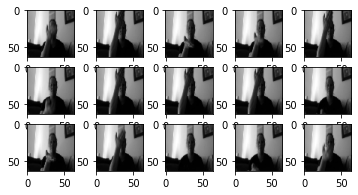

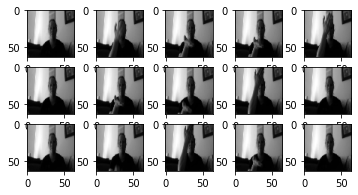

<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.figure()
for i in range(2,4):
    for num,frame in enumerate(new_frames[i][0:18]):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(frame, cmap='gray')
    fig = plt.figure()
plt.show()

In [21]:
training_data = np.array(new_frames[0:counter_training], dtype=np.float32)

In [22]:
def release_list(a):
   del a[:]
   del a

In [23]:
release_list(new_frames)

In [24]:
cv_data = np.array(new_frames_cv[0:counter_validation], dtype=np.float32)

In [25]:
release_list(new_frames_cv)

In [26]:
training_data.shape

(320, 15, 64, 64)

In [27]:
cv_data.shape

(80, 15, 64, 64)

In [28]:
print('old mean', training_data.mean())
scaler = StandardScaler()
scaled_images  = scaler.fit_transform(training_data.reshape(-1, 15*64*64))
print('new mean', scaled_images.mean())
scaled_images  = scaled_images.reshape(-1, 15, 64, 64, 1)
print(scaled_images.shape)

old mean 110.417854
new mean 3.0516336e-09
(320, 15, 64, 64, 1)


In [29]:
print('old mean', cv_data.mean())
scaler = StandardScaler()
scaled_images_cv  = scaler.fit_transform(cv_data.reshape(-1, 15*64*64))
print('new mean',scaled_images_cv.mean())
scaled_images_cv  = scaled_images_cv.reshape(-1, 15, 64, 64, 1)
print(scaled_images_cv.shape)

old mean 103.93436
new mean 7.947286e-09
(80, 15, 64, 64, 1)


In [30]:
class Conv3DModel(tf.keras.Model):
  def __init__(self):
    super(Conv3DModel, self).__init__()
    self.conv1 = tf.compat.v2.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool1 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), data_format='channels_last')
    self.conv2 = tf.compat.v2.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool2 = tf.keras.layers.MaxPool3D(pool_size=(2, 2,2), data_format='channels_last')
    self.convLSTM =tf.keras.layers.ConvLSTM2D(40, (3, 3))
    self.flatten =  tf.keras.layers.Flatten(name="flatten")
    self.d1 = tf.keras.layers.Dense(128, activation='relu', name="d1")
    self.out = tf.keras.layers.Dense(4, activation='softmax', name="output")

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.convLSTM(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.out(x)

In [31]:
model = Conv3DModel()

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [33]:
x_train = np.array(scaled_images)
y_train = np.array(training_targets)
x_val = np.array(scaled_images_cv)
y_val = np.array(cv_targets)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(320, 15, 64, 64, 1)
(320,)
(80, 15, 64, 64, 1)
(80,)


In [35]:
checkpoint_path = "training_today/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True)

In [37]:
history = model.fit(x_train, y_train,
                    callbacks = [cp_callback],
                    validation_data=(x_val, y_val),
                    batch_size=32,
                    epochs=20)

Epoch 1/20
10/10 [==============================] - 89s 9s/step - loss: 1.3694 - accuracy: 0.3156 - val_loss: 1.3261 - val_accuracy: 0.3625

Epoch 00001: saving model to training_today/cp-0001.ckpt
Epoch 2/20
10/10 [==============================] - 86s 9s/step - loss: 1.0018 - accuracy: 0.6031 - val_loss: 1.3263 - val_accuracy: 0.5000

Epoch 00002: saving model to training_today/cp-0002.ckpt
Epoch 3/20
10/10 [==============================] - 86s 9s/step - loss: 0.7074 - accuracy: 0.7500 - val_loss: 1.2807 - val_accuracy: 0.5500

Epoch 00003: saving model to training_today/cp-0003.ckpt
Epoch 4/20
10/10 [==============================] - 87s 9s/step - loss: 0.4184 - accuracy: 0.8594 - val_loss: 2.1866 - val_accuracy: 0.5125

Epoch 00004: saving model to training_today/cp-0004.ckpt
Epoch 5/20
10/10 [==============================] - 88s 9s/step - loss: 0.3440 - accuracy: 0.8813 - val_loss: 1.7174 - val_accuracy: 0.5875

Epoch 00005: saving model to training_today/cp-0005.ckpt
Epoch 6/20

In [38]:
history.history

{'accuracy': [0.31562501192092896,
  0.6031249761581421,
  0.75,
  0.859375,
  0.8812500238418579,
  0.956250011920929,
  0.987500011920929,
  0.987500011920929,
  0.9937499761581421,
  0.984375,
  0.996874988079071,
  0.996874988079071,
  0.996874988079071,
  0.996874988079071,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.369370460510254,
  1.0017547607421875,
  0.7073777914047241,
  0.41838526725769043,
  0.34395676851272583,
  0.18097944557666779,
  0.06116117164492607,
  0.04117497056722641,
  0.01979403756558895,
  0.046539537608623505,
  0.014531714841723442,
  0.014840399846434593,
  0.01911964640021324,
  0.014275411143898964,
  0.004616211634129286,
  0.0016209334135055542,
  0.0008812793530523777,
  0.0005194944678805768,
  0.0003736662329174578,
  0.00029977448866702616],
 'val_accuracy': [0.36250001192092896,
  0.5,
  0.550000011920929,
  0.512499988079071,
  0.5874999761581421,
  0.512499988079071,
  0.4625000059604645,
  0.5249999761581421,
  0.5625,
  0.5124999

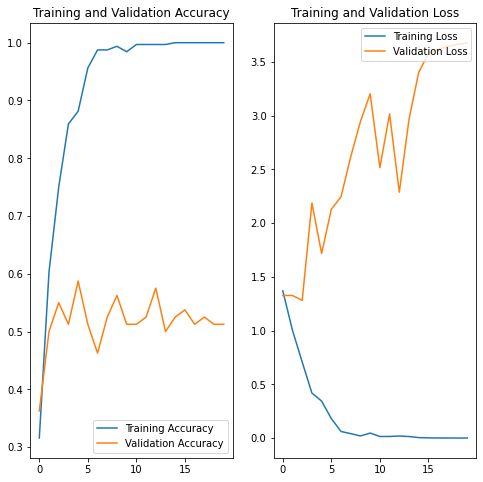

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [41]:
model.summary()

Model: "conv3d_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               multiple                  896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) multiple                  0         
_________________________________________________________________
conv1 (Conv3D)               multiple                  55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 multiple                  0         
_________________________________________________________________
conv_lst_m2d (ConvLSTM2D)    multiple                  149920    
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
d1 (Dense)                   multiple                 

In [42]:
model.save_weights('/content/weights/path_to_my_weights', save_format='tf')